# Bitcoin price Prediction using LSTM

# Importing Library

In [1]:
import os
import pandas as pd
import yfinance as yf
import numpy as np
import math
import datetime as dt
import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

/Users/fathurrahmansyah/Library/Mobile Documents/com~apple~CloudDocs/Documents/Kuliah/MatKul/Semester-7/Sempro/Bitcoin-Price-Prediction-main/.venv/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# Loading Dataset

In [2]:
df = yf.Ticker("BTC-USD").history(period="max", auto_adjust=False)
df.index = pd.to_datetime(df.index)
df.reset_index(inplace=True)
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)

In [3]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  4143
Total number of fields present in the dataset:  9


In [4]:
df.shape

(4143, 9)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,0.0,0.0


In [6]:
df.tail(20)

,Date,Open,High,Low,Close,Adj_Close,Volume,Dividends,Stock Splits
4123,2025-12-31 00:00:00+00:00,88429.585938,89080.289062,87130.562500,87508.828125,87508.828125,33830210616,0.0,0.0
4124,2026-01-01 00:00:00+00:00,87508.046875,88803.226562,87399.406250,88731.984375,88731.984375,18849043990,0.0,0.0
4125,2026-01-02 00:00:00+00:00,88733.062500,90884.460938,88298.617188,89944.695312,89944.695312,46398906171,0.0,0.0
4126,2026-01-03 00:00:00+00:00,89945.054688,90679.570312,89328.070312,90603.187500,90603.187500,20774828592,0.0,0.0
4127,2026-01-04 00:00:00+00:00,90603.000000,91712.585938,90595.101562,91413.492188,91413.492188,26770491368,0.0,0.0
4128,2026-01-05 00:00:00+00:00,91414.625000,94762.070312,91414.625000,93882.554688,93882.554688,53376407252,0.0,0.0
4129,2026-01-06 00:00:00+00:00,93876.945312,94395.296875,91286.546875,93729.031250,93729.031250,52430605257,0.0,0.0
4130,2026-01-07 00:00:00+00:00,93727.468750,93738.789062,90601.804688,91308.054688,91308.054688,43461295053,0.0,0.0
4131,2026-01-08 00:00:00+00:00,91309.640625,91485.851562,89233.875000,91027.125000,91027.125000,42386697030,0.0,0.0
4132,2026-01-09 00:00:00+00:00,91026.273438,91910.671875,89625.382812,90513.101562,90513.101562,38305906684,0.0,0.0


In [7]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          4143 non-null   datetime64[ns, UTC]
 1   Open          4143 non-null   float64            
 2   High          4143 non-null   float64            
 3   Low           4143 non-null   float64            
 4   Close         4143 non-null   float64            
 5   Adj_Close     4143 non-null   float64            
 6   Volume        4143 non-null   int64              
 7   Dividends     4143 non-null   float64            
 8   Stock Splits  4143 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 291.4 KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [8]:
df.describe()

,Open,High,Low,Close,Adj_Close,Volume,Dividends,Stock Splits
count,4143.000000,4143.000000,4143.000000,4143.000000,4143.000000,4.143000e+03,4143.0,4143.0
mean,27128.373456,27671.394531,26555.766024,27149.624861,27149.624861,2.169731e+10,0.0,0.0
std,31875.876862,32416.876788,31301.240199,31888.768649,31888.768649,2.287595e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06,0.0,0.0
25%,2718.684937,2811.035034,2655.824951,2724.119995,2724.119995,1.335040e+09,0.0,0.0
50%,10821.632812,11095.870117,10528.890625,10844.640625,10844.640625,1.713054e+10,0.0,0.0
75%,42544.115234,43345.417969,41701.164062,42583.093750,42583.093750,3.333709e+10,0.0,0.0
max,124752.140625,126198.070312,123196.046875,124752.531250,124752.531250,3.509679e+11,0.0,0.0


# Checking for Null Values

In [9]:
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [10]:
print('NA values:',df.isnull().values.any())

NA values: False


In [11]:
df.shape

(4143, 9)

# Checking for Timestamp Skip

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

delta = df['Date'].diff().dropna()
inconsistent_dates = delta[delta != '1 days']

print("Number of inconsistent dates:", len(inconsistent_dates))
if len(inconsistent_dates) == 0:
    print("Consistent Timestamp: The difference between dates is always 1 day.")
else:
    print("Missing dates found at index:", inconsistent_dates.index.tolist())

Number of inconsistent dates: 0
Consistent Timestamp: The difference between dates is always 1 day.


In [13]:
df.set_index('Date', inplace=True)
df = df.asfreq('D')
df['Close'] = df['Close'].interpolate(method='linear')
df = df.ffill()
df.reset_index(inplace=True)

print("Rechecking missing dates count:", df['Close'].isnull().sum())

Rechecking missing dates count: 0


# EDA(Exploratory Data Analysis)

In [14]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2014-09-17 00:00:00+00:00
Ending Date 2026-01-19 00:00:00+00:00


/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_59029/2310875056.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sd=df.iloc[0][0]
/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_59029/2310875056.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ed=df.iloc[-1][0]


## Analysis of year 2014

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')


y_2014 = df.loc[(df['Date'] >= '2014-09-17')
                     & (df['Date'] < '2014-12-31')]

y_2014.drop(y_2014[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,0.0,0.0
...,...,...,...,...,...,...,...
100,2014-12-26 00:00:00+00:00,319.152008,331.424011,316.627014,327.924011,0.0,0.0
101,2014-12-27 00:00:00+00:00,327.583008,328.911011,312.630005,315.863007,0.0,0.0
102,2014-12-28 00:00:00+00:00,316.160004,320.028015,311.078003,317.239014,0.0,0.0
103,2014-12-29 00:00:00+00:00,317.700989,320.266998,312.307007,312.670013,0.0,0.0


In [16]:
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,412.654003,407.182428


In [17]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Bitcoin Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Bitcoin Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparison between Bitcoin open and close price')
fig.show()

In [18]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Bitcoin high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Bitcoin low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low Bitcoin price')
fig.show()

In [19]:
names = cycle(['Bitcoin Open Price','Bitcoin Close Price','Bitcoin High Price','Bitcoin Low Price'])

fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'], 
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Date','value':'Bitcoin value'})
fig.update_layout(title_text='Bitcoin analysis chart', font_size=15, font_color='black',legend_title_text='Bitcoin Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## 2nd Bitcoin Halving

In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2015 = df.loc[(df['Date'] >= '2012-11-28')
                        & (df['Date'] < '2016-09-09')]

y_2015.drop(y_2015[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,0.0,0.0
...,...,...,...,...,...,...,...
718,2016-09-04 00:00:00+00:00,598.590027,611.836975,596.848022,608.633972,0.0,0.0
719,2016-09-05 00:00:00+00:00,608.989990,609.054993,602.242004,606.590027,0.0,0.0
720,2016-09-06 00:00:00+00:00,606.505981,610.830017,605.091003,610.435974,0.0,0.0
721,2016-09-07 00:00:00+00:00,610.572998,614.544983,608.513000,614.544006,0.0,0.0


In [21]:
monthvise = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,332.302904,329.813516
February,319.049966,320.774421
March,343.270226,342.784016
April,334.598050,334.915466
May,348.199677,349.475708
June,437.743134,440.475414
July,470.917729,470.459921
August,417.112870,415.159501
September,337.395443,336.942152


In [22]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [23]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [24]:
model = LinearRegression()
X = np.arange(len(y_2015)).reshape(-1, 1)
y = y_2015['Close']
model.fit(X, y)

y_2015['Predicted'] = model.predict(X)

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price','Predicted Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.add_scatter(
    x=y_2015['Date'],
    y=y_2015['Predicted'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='blue', dash='dot')
)
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_59029/3576084021.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 3rd Bitcoin Halving

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2015 = df.loc[(df['Date'] >= '2016-09-09')
                        & (df['Date'] < '2020-05-11')]

y_2015.drop(y_2015[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Dividends,Stock Splits
723,2016-09-09 00:00:00+00:00,626.351990,626.830017,620.263000,622.861023,0.0,0.0
724,2016-09-10 00:00:00+00:00,622.927002,625.094971,622.395020,623.508972,0.0,0.0
725,2016-09-11 00:00:00+00:00,623.424011,628.817993,600.505981,606.718994,0.0,0.0
726,2016-09-12 00:00:00+00:00,607.005005,608.458984,605.411011,608.242981,0.0,0.0
727,2016-09-13 00:00:00+00:00,608.025024,611.192993,606.924988,609.241028,0.0,0.0
...,...,...,...,...,...,...,...
2058,2020-05-06 00:00:00+00:00,9007.441406,9411.467773,8966.706055,9268.761719,0.0,0.0
2059,2020-05-07 00:00:00+00:00,9261.895508,9992.664062,9138.322266,9951.518555,0.0,0.0
2060,2020-05-08 00:00:00+00:00,9936.162109,9996.743164,9767.172852,9842.666016,0.0,0.0
2061,2020-05-09 00:00:00+00:00,9840.906250,9913.863281,9580.644531,9593.896484,0.0,0.0


In [26]:
monthvise = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,6538.852608,6522.824922
February,6000.454825,6001.693113
March,5300.262926,5254.251885
April,5362.172487,5410.796100
May,6182.851701,6207.943371
June,6266.437210,6281.870730
July,6767.461913,6778.368177
August,7067.119718,7074.789435
September,5626.129825,5607.591639


In [27]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [28]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [29]:
model = LinearRegression()
X = np.arange(len(y_2015)).reshape(-1, 1)
y = y_2015['Close']
model.fit(X, y)

y_2015['Predicted'] = model.predict(X)

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price','Predicted Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.add_scatter(
    x=y_2015['Date'],
    y=y_2015['Predicted'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='blue', dash='dot')
)
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_59029/3576084021.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 4th Bitcoin halving

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2015 = df.loc[(df['Date'] >= '2020-05-11')
                        & (df['Date'] < '2024-04-19')]

y_2015.drop(y_2015[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Dividends,Stock Splits
2063,2020-05-11 00:00:00+00:00,8755.535156,9033.470703,8374.323242,8601.795898,0.0,0.0
2064,2020-05-12 00:00:00+00:00,8610.385742,8949.898438,8569.643555,8804.477539,0.0,0.0
2065,2020-05-13 00:00:00+00:00,8805.387695,9317.878906,8805.387695,9269.987305,0.0,0.0
2066,2020-05-14 00:00:00+00:00,9271.329102,9793.268555,9255.035156,9733.721680,0.0,0.0
2067,2020-05-15 00:00:00+00:00,9734.291016,9755.828125,9261.398438,9328.197266,0.0,0.0
...,...,...,...,...,...,...,...
3497,2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,0.0,0.0
3498,2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,0.0,0.0
3499,2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,0.0,0.0
3500,2024-04-17 00:00:00+00:00,63831.847656,64486.363281,59768.585938,61276.691406,0.0,0.0


In [31]:
monthvise = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,34743.727665,34761.600554
February,39834.375985,40149.334486
March,47187.979854,47445.896595
April,46730.277687,46582.647805
May,30684.615337,30440.241614
June,24463.902295,24370.316455
July,23819.274233,23907.899327
August,26896.710055,26895.119007
September,25706.045369,25677.740991


In [32]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [33]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [34]:
model = LinearRegression()
X = np.arange(len(y_2015)).reshape(-1, 1)
y = y_2015['Close']
model.fit(X, y)

y_2015['Predicted'] = model.predict(X)

names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price','Predicted Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.add_scatter(
    x=y_2015['Date'],
    y=y_2015['Predicted'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='blue', dash='dot')
)
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_59029/3576084021.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Overall Analysis from 2014-Now

In [35]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '2014-09-17')
                     & (df['Date'] <= df['Date'].max())]

y_overall.drop(y_overall[['Adj_Close','Volume']],axis=1)

,Date,Open,High,Low,Close,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,0.0,0.0
...,...,...,...,...,...,...,...
4138,2026-01-15 00:00:00+00:00,96931.289062,97150.171875,95103.242188,95551.187500,0.0,0.0
4139,2026-01-16 00:00:00+00:00,95554.101562,95801.890625,94259.273438,95525.117188,0.0,0.0
4140,2026-01-17 00:00:00+00:00,95525.156250,95598.476562,95005.617188,95099.921875,0.0,0.0
4141,2026-01-18 00:00:00+00:00,95101.179688,95491.507812,93588.867188,93634.429688,0.0,0.0


In [36]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,27732.539625,27771.802262
February,25348.366142,25406.720668
March,26888.628068,26960.194731
April,27471.537481,27467.520481
May,27493.654038,27470.700885
June,26302.794476,26266.594703
July,26758.625535,26825.036264
August,27709.386108,27671.936334
September,25953.739260,25967.578655


In [37]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building LSTM Model

In [38]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (4143, 2)


In [39]:
# halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11', '2024-04-19']
# df['Date'] = pd.to_datetime(df['Date'])
# df['is_halving'] = df['Date'].isin(pd.to_datetime(halving_dates)).astype(int)
# closedf = df[['Date', 'Close', 'is_halving']].copy()

In [40]:
# halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11', '2024-04-19']
# df['Date'] = pd.to_datetime(df['Date'])
# df['is_halving'] = df['Date'].isin(pd.to_datetime(halving_dates)).astype(int)
# closedf = df[['Date', 'Close', 'is_halving']]
# print("Shape of close dataframe:", closedf.shape)

In [41]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014 - Now', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 1 Year

In [ ]:
last_date = closedf['Date'].max()
# start_date = last_date - pd.Timedelta(days=365)  # 1 years
# start_date = last_date - pd.Timedelta(days=1460)  # 4 years
# df = yf.Ticker("BTC-USD").history(start="2014-09-17", end="2025-12-26", auto_adjust=False)
start_date = closedf['Date'].min()
closedf = closedf[closedf['Date'] >= start_date]
close_stock = closedf.copy()
print("Total data for prediction: ", closedf.shape[0])

Total data for prediction:  4143


In [43]:
closedf

,Date,Close
0,2014-09-17 00:00:00+00:00,457.334015
1,2014-09-18 00:00:00+00:00,424.440002
2,2014-09-19 00:00:00+00:00,394.795990
3,2014-09-20 00:00:00+00:00,408.903992
4,2014-09-21 00:00:00+00:00,398.821014
...,...,...
4138,2026-01-15 00:00:00+00:00,95551.187500
4139,2026-01-16 00:00:00+00:00,95525.117188
4140,2026-01-17 00:00:00+00:00,95099.921875
4141,2026-01-18 00:00:00+00:00,93634.429688


In [44]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data

In [45]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(4143, 1)


In [46]:
# del closedf['Date']
# scaler=MinMaxScaler(feature_range=(0,1))
# closedf=scaler.fit_transform(closedf[['Close', 'is_halving']])
# print(closedf.shape)

In [47]:
# feature_cols = ['Close', 'is_halving']
# scaler = MinMaxScaler(feature_range=(0, 1))
# closedf = scaler.fit_transform(closedf[feature_cols])

In [48]:
# with open('Model/scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

* ### Slicing data into Training set and Testing set

In [49]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2900, 1)
test_data:  (1243, 1)


* ### Take 15 days for Time-series-analysis forecasting requirement

In [50]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [51]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2839, 60)
y_train:  (2839,)
X_test:  (1182, 60)
y_test (1182,)


In [52]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2839, 60, 1)
X_test:  (1182, 60, 1)


In [53]:
# def create_dataset_multivariate(dataset, time_step=60):
#     dataX, dataY = [], []
#     for i in range(len(dataset) - time_step):
#         x_seq = dataset[i:(i + time_step), :]  # ambil semua fitur
#         y_target = dataset[i + time_step, 0]   # target: kolom ke-0, yaitu Close
#         dataX.append(x_seq)
#         dataY.append(y_target)
#     return np.array(dataX), np.array(dataY)

# # Train-test split

# train_size = int(len(closedf) * 0.8)
# train_data = closedf[:train_size]
# test_data = closedf[train_size - 60:]  # backtrack 60 step untuk context

# # Bentuk dataset
# time_step = 60
# X_train, y_train = create_dataset_multivariate(train_data, 60)
# X_test, y_test = create_dataset_multivariate(test_data, 60)

* # Actual Model Building

## 5 Scenarios Implementation

In [ ]:
scenarios = {
    "Scenario 1": {
        "time_step": 60,
        "split_ratio": 0.7,
        "epochs": 50,
        "batch_size": 32,
        "layers": [
            {"type": "LSTM", "units": 128, "return_sequences": True},
            {"type": "Dropout", "rate": 0.2},
            {"type": "LSTM", "units": 64, "return_sequences": False},
            {"type": "Dropout", "rate": 0.2},
            {"type": "Dense", "units": 1}
        ]
    },
    "Scenario 2": {
        "time_step": 30,
        "split_ratio": 0.8,
        "epochs": 50,
        "batch_size": 64,
        "layers": [
            {"type": "LSTM", "units": 50, "return_sequences": False},
            {"type": "Dropout", "rate": 0.2},
            {"type": "Dense", "units": 1}
        ]
    },
    "Scenario 3": {
        "time_step": 90,
        "split_ratio": 0.7,
        "epochs": 50,
        "batch_size": 32,
        "layers": [
            {"type": "LSTM", "units": 128, "return_sequences": True},
            {"type": "Dropout", "rate": 0.3},
            {"type": "LSTM", "units": 64, "return_sequences": True},
            {"type": "Dropout", "rate": 0.3},
            {"type": "LSTM", "units": 32, "return_sequences": False},
            {"type": "Dropout", "rate": 0.3},
            {"type": "Dense", "units": 1}
        ]
    },
    "Scenario 4": {
        "time_step": 120,
        "split_ratio": 0.7,
        "epochs": 50,
        "batch_size": 16,
        "layers": [
            {"type": "LSTM", "units": 100, "return_sequences": True},
            {"type": "Dropout", "rate": 0.2},
            {"type": "LSTM", "units": 100, "return_sequences": False},
            {"type": "Dropout", "rate": 0.2},
            {"type": "Dense", "units": 1}
        ]
    },
    "Scenario 5": {
        "time_step": 60,
        "split_ratio": 0.6,
        "epochs": 50,
        "batch_size": 64,
        "layers": [
            {"type": "LSTM", "units": 256, "return_sequences": True},
            {"type": "Dropout", "rate": 0.4},
            {"type": "LSTM", "units": 128, "return_sequences": False},
            {"type": "Dropout", "rate": 0.4},
            {"type": "Dense", "units": 1}
        ]
    },
    "Scenario 6": {
        "time_step": 150,       
        "split_ratio": 0.7,
        "epochs": 50,           
        "batch_size": 16,        
        "layers": [
            {"type": "LSTM", "units": 100, "return_sequences": True},
            {"type": "Dropout", "rate": 0.3},
            {"type": "LSTM", "units": 100, "return_sequences": False},
            {"type": "Dropout", "rate": 0.3},
            {"type": "Dense", "units": 1}
        ]
    }
}


In [55]:
def build_model(config, input_shape):
    model = Sequential()
    layers_config = config['layers']
    
    for i, layer in enumerate(layers_config):
        if layer['type'] == 'LSTM':
            return_sequences = layer.get('return_sequences', False)
            if i == 0:
                model.add(LSTM(layer['units'], return_sequences=return_sequences, input_shape=input_shape))
            else:
                model.add(LSTM(layer['units'], return_sequences=return_sequences))
        elif layer['type'] == 'Dropout':
            model.add(Dropout(layer['rate']))
        elif layer['type'] == 'Dense':
            model.add(Dense(layer['units']))
            
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model


In [56]:
def run_scenario(scenario_name, config, df):
    print(f"\n--- Running Scenario: {scenario_name} ---")
    
    closedf_local = df[['Close']].copy()
    scaler = MinMaxScaler(feature_range=(0,1))
    closedf_scaled = scaler.fit_transform(np.array(closedf_local).reshape(-1,1))
    
    training_size = int(len(closedf_scaled) * config['split_ratio'])
    test_size = len(closedf_scaled) - training_size
    train_data, test_data = closedf_scaled[0:training_size,:], closedf_scaled[training_size:len(closedf_scaled),:1]
    
    time_step = config['time_step']
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    model = build_model(config, (time_step, 1))
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=config['epochs'],
        batch_size=config.get('batch_size', 32),
        callbacks=[early_stop],
        verbose=1
    )
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
    
    rmse = math.sqrt(mean_squared_error(y_test_inv, test_predict))
    print(f"Scenario {scenario_name} - Test RMSE: {rmse}")
    
    return {
        "name": scenario_name,
        "rmse": rmse,
        "model": model,
        "history": history,
        "scaler": scaler,
        "time_step": time_step,
        "train_data": train_data,
        "test_data": test_data,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }


## Execute and Select Best Model

In [57]:
results = []
target_df = df.loc[df['Date'] >= '2014-09-17'] if 'Date' in df.columns else df 

for name, config in scenarios.items():
    try:
        res = run_scenario(name, config, target_df)
        results.append(res)
    except Exception as e:
        print(f"Error in {name}: {e}")

best_result = min(results, key=lambda x: x['rmse'])
print(f"\nBest Model: {best_result['name']} with RMSE: {best_result['rmse']}")

model = best_result['model']
history = best_result['history']
scaler = best_result['scaler']
time_step = best_result['time_step']
train_data = best_result['train_data']
test_data = best_result['test_data']
X_train = best_result['X_train']
X_test = best_result['X_test']
y_train = best_result['y_train']
y_test = best_result['y_test']

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)



--- Running Scenario: Scenario 6 ---


Epoch 1/50


/Users/fathurrahmansyah/Library/Mobile Documents/com~apple~CloudDocs/Documents/Kuliah/MatKul/Semester-7/Sempro/Bitcoin-Price-Prediction-main/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



171/171 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 0.0012 - val_loss: 8.9604e-04
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 5.3315e-04 - val_loss: 0.0022
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 5.1018e-04 - val_loss: 0.0035
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 4.2514e-04 - val_loss: 0.0043
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 3.6194e-04 - val_loss: 0.0029
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 4.0470e-04 - val_loss: 8.2437e-04
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - loss: 3.1227e-04 - val_loss: 0.0024
Epoch 8/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 3.0635e-04 - val_loss: 0.0019
Epoch 9/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 2.9164e-04 - val_loss: 0.0058
Epoch 10/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 2.8576e-04 - val_loss: 6.6233e-04
Epoch 11/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 2.9525e-04 - val_lo

/var/folders/2z/b4nb34mn4vb203chvsvh7x7m0000gn/T/ipykernel_59029/79309527.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




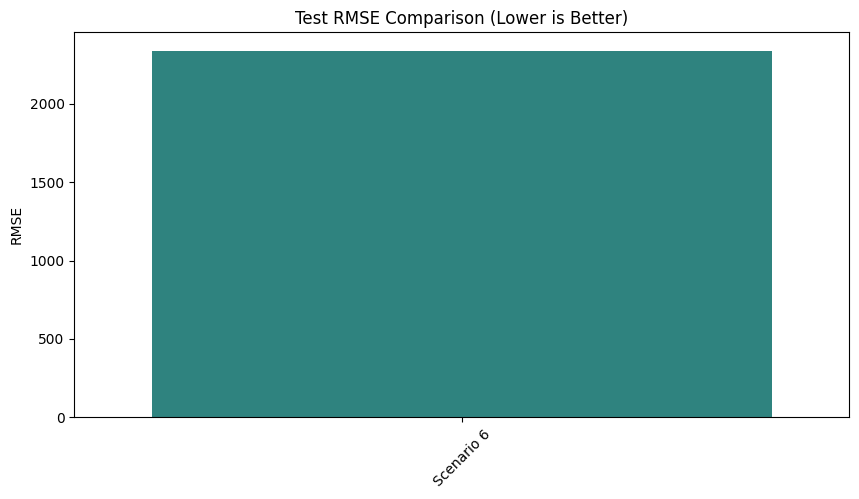

In [58]:
import seaborn as sns

names = [r['name'] for r in results]
rmses = [r['rmse'] for r in results]

plt.figure(figsize=(10, 5))
sns.barplot(x=names, y=rmses, palette='viridis')
plt.title('Test RMSE Comparison (Lower is Better)')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.show()

- ### Plotting Loss vs Validation loss 

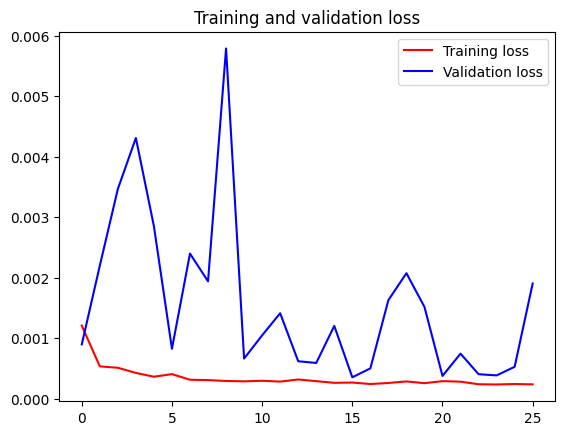

<Figure size 640x480 with 0 Axes>

In [59]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [60]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


((2731, 1), (1085, 1))

- # Model Evaluation

In [61]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [62]:
train_mae = mean_absolute_error(original_ytrain, train_predict)
test_mae = mean_absolute_error(original_ytest, test_predict)
train_mean = np.mean(original_ytrain)
test_mean = np.mean(original_ytest)

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", train_mae)
print("Train MAE (%): {:.2f}%".format((train_mae/train_mean)*100))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", test_mae)
print("Test MAE (%): {:.2f}%".format((test_mae/test_mean)*100))

Train data RMSE:  1264.019553899229
Train data MSE:  1597745.4326396063
Train data MAE:  847.2023560574796
Train MAE (%): 6.41%
-------------------------------------------------------------------------------------
Test data RMSE:  2339.1878654661805
Test data MSE:  5471799.869944225
Test data MAE:  1732.2565182171659
Test MAE (%): 2.64%


- ## Variance Regression Score

In [63]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.994338836525436
Test data explained variance regression score: 0.9945890139684918


- # Comparision of original Bitcoin close price and predicted close price

In [64]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
test_start_index = len(train_predict) + (look_back * 2) + 1
testPredictPlot[test_start_index:test_start_index+len(test_predict), :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (4143, 1)
Test predicted data:  (4143, 1)


- # Predicting next 30 days

In [65]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


- # Plotting last 15 days of dataset and next predicted 30 days

In [66]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]
[151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180]


In [67]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [68]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [69]:
# model.save('Model/model.h5')